Inladen

In [127]:
import technische_analyse
import fundamentele_analyse
import fin_model
import yfinance as yf
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:.6f}'.format

# Autmatisch laden geimporteerde files bij elke wijziging
%load_ext autoreload
%autoreload 2

# Parameters
lagg = 30
start = "2011-01-01"
seq_length = 90 # We maken sequenties van bijvoorbeeld 30 dagen om de volgende dag te voorspellen
drempelwaarde = 0.5

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Preprocessing

In [128]:
import yfinance as yf
import pandas as pd

# Historische data op voor de S&P 500 tot de huidige dag
data = yf.download("SPY", start=start, progress=False)  

# Controleer of er een MultiIndex is en maak deze plat
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Verwijder uren uit de datums en formatteer als YYYY-MM-DD
data.index = data.index.strftime('%Y-%m-%d')
data.index = pd.to_datetime(data.index)

data.head()


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2011-01-03,98.665199,127.050003,127.599998,125.699997,126.709999,138725200
2011-01-04,98.610840,126.980003,127.370003,126.190002,127.330002,137409700
2011-01-05,99.123383,127.639999,127.720001,126.459999,126.580002,133975300
2011-01-06,98.929230,127.389999,127.830002,127.010002,127.690002,122519000
2011-01-07,98.735085,127.139999,127.769997,126.150002,127.559998,156034600


Technische analyse

- MA en EMA zijn beide voortschrijdende gemiddelden die helpen bij het identificeren van de algemene prijsrichting, maar de EMA reageert sneller op prijsbewegingen omdat deze meer gewicht toekent aan recentere gegevens.
- Bollinger Bands meten de volatiliteit van een actief en helpen bij het identificeren van overgekochte of oververkochte situaties.
- RSI meet de snelheid en de veranderingen van prijsbewegingen om overgekochte of oververkochte condities te signaleren.
- MACD helpt bij het identificeren van trends en het genereren van koop- of verkoopsignalen door de relatie tussen twee voortschrijdende gemiddelden van de prijs te analyseren.
- De VWAP berekent de gemiddelde prijs van een aandeel gedurende de handelsdag, gewogen door het volume.

In [129]:
pd.options.display.float_format = '{:.6f}'.format

# Technische analyse
data_technische_analyse = technische_analyse.add_indicators(data, lagg)
print(data_technische_analyse.tail())

            Adj Close      Close       High        Low       Open    Volume  \
Date                                                                          
2024-12-04 607.659973 607.659973 607.909973 604.950012 605.630005  42787600   
2024-12-05 606.659973 606.659973 608.479980 606.299988 607.659973  28762200   
2024-12-06 607.809998 607.809998 609.070007 607.020020 607.440002  31241500   
2024-12-09 604.679993 604.679993 607.859985 604.080017 607.690002  34688100   
2024-12-10 605.505005 605.505005 605.799988 604.273987 605.369995   5526684   

              Change  Target       MA_5      MA_10  ...  Prev_Open_27  \
Date                                                ...                 
2024-12-04  0.006210       1 603.315991 599.444000  ...    581.510010   
2024-12-05 -0.001646       0 604.881982 601.059998  ...    582.580017   
2024-12-06  0.001896       1 605.933984 602.473999  ...    579.849976   
2024-12-09 -0.005150       0 606.143982 603.390997  ...    581.289978   
2024-12-

In [130]:
data_technische_analyse_2 = technische_analyse.add_change_features(data_technische_analyse)
data_technische_analyse_2

,Adj Close,Close,High,Low,Open,Volume,Change,Target,MA_5,MA_10,...,Cumulative_Change_5,Cumulative_Change_10,Up_Days_Count_10,Down_Days_Count_10,Change_Std_Dev_5,Change_Std_Dev_10,Change_to_Volume_Ratio,Change_to_Volatility,Streak_Up,Streak_Down
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,101.678337,130.929993,133.690002,130.889999,133.570007,258565500,-0.016673,0,131.671997,132.582999,...,-0.006615,-0.018443,5.000000,5.000000,0.010726,0.010004,-0.000000,-0.795358,0,1
2011-03-02,101.895790,131.210007,131.820007,130.350006,130.750000,200277400,0.002139,1,131.709998,132.403000,...,0.001668,-0.013157,6.000000,4.000000,0.010431,0.010067,0.000000,0.190224,1,0
2011-03-03,103.650871,133.470001,133.619995,132.389999,132.399994,176480100,0.017224,1,132.217999,132.364999,...,0.019579,-0.002248,6.000000,4.000000,0.012799,0.011478,0.000000,1.854064,2,0
2011-03-04,102.874306,132.470001,133.630005,131.600006,133.369995,277202300,-0.007492,0,132.245999,132.187000,...,0.001394,-0.012728,5.000000,5.000000,0.012975,0.011630,-0.000000,-0.492242,0,1
2011-03-07,102.066612,131.429993,133.160004,130.740005,132.860001,216790400,-0.007851,0,131.901999,131.876999,...,-0.012653,-0.022665,4.000000,6.000000,0.012894,0.011735,-0.000000,-0.431021,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04,607.659973,607.659973,607.909973,604.950012,605.630005,42787600,0.006210,1,603.315991,599.444000,...,0.011648,0.029068,9.000000,1.000000,0.003957,0.003029,0.000000,1.270517,4,0
2024-12-05,606.659973,606.659973,608.479980,606.299988,607.659973,28762200,-0.001646,0,604.881982,601.059998,...,0.013032,0.027083,8.000000,2.000000,0.003511,0.003271,-0.000000,-0.458717,0,1
2024-12-06,607.809998,607.809998,609.070007,607.020020,607.440002,31241500,0.001896,1,605.933984,602.473999,...,0.008716,0.023611,8.000000,2.000000,0.002876,0.003139,0.000000,0.561712,1,0


In [131]:
# Technische analyse deel 2
data_technische_analyse_3 = technische_analyse.add_economic_indicators_from_fred(data_technische_analyse_2)
print(data_technische_analyse_3.head())

Succesvol toegevoegd: Unemployment Rate (UNRATE)
Succesvol toegevoegd: CPI (Inflation) (CPIAUCSL)
Succesvol toegevoegd: GDP Growth (GDP)
Succesvol toegevoegd: 10-Year Treasury Rate (DGS10)
Succesvol toegevoegd: Effective Federal Funds Rate (FEDFUNDS)
Succesvol toegevoegd: Personal Consumption Expenditures (PCE)
Succesvol toegevoegd: Industrial Production Index (INDPRO)
Succesvol toegevoegd: Money Stock (M2) (M2SL)
            Adj Close      Close       High        Low       Open     Volume  \
Date                                                                           
2011-03-01 101.678337 130.929993 133.690002 130.889999 133.570007  258565500   
2011-03-02 101.895790 131.210007 131.820007 130.350006 130.750000  200277400   
2011-03-03 103.650871 133.470001 133.619995 132.389999 132.399994  176480100   
2011-03-04 102.874306 132.470001 133.630005 131.600006 133.369995  277202300   
2011-03-07 102.066612 131.429993 133.160004 130.740005 132.860001  216790400   

              Change 

Fundamentele analyse

In [132]:
# Fundamentele analyse
data_fundamentele = fundamentele_analyse.add_economic_indicators(data_technische_analyse_3)
print(data_fundamentele.head())

            Adj Close      Close       High        Low       Open     Volume  \
Date                                                                           
2011-03-01 101.678337 130.929993 133.690002 130.889999 133.570007  258565500   
2011-03-02 101.895790 131.210007 131.820007 130.350006 130.750000  200277400   
2011-03-03 103.650871 133.470001 133.619995 132.389999 132.399994  176480100   
2011-03-04 102.874306 132.470001 133.630005 131.600006 133.369995  277202300   
2011-03-07 102.066612 131.429993 133.160004 130.740005 132.860001  216790400   

              Change  Target       MA_5      MA_10  ...  \
Date                                                ...   
2011-03-01 -0.016673       0 131.671997 132.582999  ...   
2011-03-02  0.002139       1 131.709998 132.403000  ...   
2011-03-03  0.017224       1 132.217999 132.364999  ...   
2011-03-04 -0.007492       0 132.245999 132.187000  ...   
2011-03-07 -0.007851       0 131.901999 131.876999  ...   

            Effective Fed

Strategien

In [133]:
# Roep de functie aan
df_with_predictions = fin_model.linear_model_predictions(data_fundamentele, start=start)

df_with_predictions

,Adj Close,Close,High,Low,Open,Volume,Change,Target,MA_5,MA_10,...,Personal Consumption Expenditures,Industrial Production Index,Money Stock (M2),VIX,Technology,Energy,Financials,Healthcare,10Yr_Treasury_Rate,Linear_model
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,101.678337,130.929993,133.690002,130.889999,133.570007,258565500,-0.016673,0,131.671997,132.582999,...,10619.700000,93.968400,8967.000000,21.010000,26.049999,77.070000,13.395613,32.410000,3.414000,83.297987
2011-03-02,101.895790,131.210007,131.820007,130.350006,130.750000,200277400,0.002139,1,131.709998,132.403000,...,10619.700000,93.968400,8967.000000,20.700001,26.209999,77.510002,13.314379,32.509998,3.464000,83.413964
2011-03-03,103.650871,133.470001,133.619995,132.389999,132.399994,176480100,0.017224,1,132.217999,132.364999,...,10619.700000,93.968400,8967.000000,18.600000,26.629999,78.839996,13.590577,33.180000,3.572000,83.529940
2011-03-04,102.874306,132.470001,133.630005,131.600006,133.369995,277202300,-0.007492,0,132.245999,132.187000,...,10619.700000,93.968400,8967.000000,19.059999,26.420000,78.339996,13.419984,33.130001,3.492000,83.645917
2011-03-07,102.066612,131.429993,133.160004,130.740005,132.860001,216790400,-0.007851,0,131.901999,131.876999,...,10619.700000,93.968400,8967.000000,20.660000,26.080000,77.790001,13.330626,32.880001,3.497000,83.761894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04,607.659973,607.659973,607.909973,604.950012,605.630005,42787600,0.006210,1,603.315991,599.444000,...,20099.500000,102.280500,21311.200000,13.450000,241.130005,92.230003,50.259998,146.740005,4.180000,485.041115
2024-12-05,606.659973,606.659973,608.479980,606.299988,607.659973,28762200,-0.001646,0,604.881982,601.059998,...,20099.500000,102.280500,21311.200000,13.540000,239.910004,92.589996,50.410000,145.100006,4.180000,485.157091
2024-12-06,607.809998,607.809998,609.070007,607.020020,607.440002,31241500,0.001896,1,605.933984,602.473999,...,20099.500000,102.280500,21311.200000,12.770000,240.839996,91.019997,50.400002,144.279999,4.151000,485.273068


Sentiment analyse

In [134]:
# Voorbeeld van het aanroepen van de functie voor de 'SPY' ticker en bestaande 'data'
# df_spy_with_sentiment, df_daily_avg = sentiment.fetch_and_analyze_sentiment("SPY", data_fundamentele2)
df_spy_with_sentiment = df_with_predictions.copy()

Financial models

In [135]:
df_fin_model_1 ['Probability_fin_model_1']

Date
2011-02-15        NaN
2011-02-16        NaN
2011-02-17        NaN
2011-02-18        NaN
2011-02-22        NaN
               ...   
2024-12-03   0.106271
2024-12-04   0.091987
2024-12-05   0.095634
2024-12-06   0.090502
2024-12-09   0.133533
Name: Probability_fin_model_1, Length: 3477, dtype: float64

In [136]:
# Pas het model toe
df_fin_model_1 = fin_model.fin_model_1(df_spy_with_sentiment)
# df_fin_model_1 = df_spy_with_sentiment.copy()

# Bekijk de resultaten
print(df_fin_model_1.head(20))

            Adj Close      Close       High        Low       Open     Volume  \
Date                                                                           
2011-03-01 101.678337 130.929993 133.690002 130.889999 133.570007  258565500   
2011-03-02 101.895790 131.210007 131.820007 130.350006 130.750000  200277400   
2011-03-03 103.650871 133.470001 133.619995 132.389999 132.399994  176480100   
2011-03-04 102.874306 132.470001 133.630005 131.600006 133.369995  277202300   
2011-03-07 102.066612 131.429993 133.160004 130.740005 132.860001  216790400   
2011-03-08 102.959717 132.580002 133.000000 131.070007 131.639999  174615000   
2011-03-09 102.812111 132.389999 132.800003 131.600006 132.320007  153806000   
2011-03-10 100.909515 129.940002 131.179993 129.809998 131.000000  301291800   
2011-03-11 101.608475 130.839996 131.309998 129.490005 129.520004  225621800   
2011-03-14 100.994965 130.050003 130.479996 129.059998 129.990005  234974100   
2011-03-15  99.837837 128.559998 129.330

In [137]:
df_fin_model_2 = fin_model.fin_model_2(df_fin_model_1)
df_fin_model_2

,Adj Close,Close,High,Low,Open,Volume,Change,Target,MA_5,MA_10,...,Technology,Energy,Financials,Healthcare,10Yr_Treasury_Rate,Linear_model,Signal_fin_model_1,Probability_fin_model_1,Signal_fin_model_2,Probability_fin_model_2
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,101.678337,130.929993,133.690002,130.889999,133.570007,258565500,-0.016673,0,131.671997,132.582999,...,26.049999,77.070000,13.395613,32.410000,3.414000,83.297987,NaN,NaN,NaN,NaN
2011-03-02,101.895790,131.210007,131.820007,130.350006,130.750000,200277400,0.002139,1,131.709998,132.403000,...,26.209999,77.510002,13.314379,32.509998,3.464000,83.413964,NaN,NaN,NaN,NaN
2011-03-03,103.650871,133.470001,133.619995,132.389999,132.399994,176480100,0.017224,1,132.217999,132.364999,...,26.629999,78.839996,13.590577,33.180000,3.572000,83.529940,NaN,NaN,NaN,NaN
2011-03-04,102.874306,132.470001,133.630005,131.600006,133.369995,277202300,-0.007492,0,132.245999,132.187000,...,26.420000,78.339996,13.419984,33.130001,3.492000,83.645917,NaN,NaN,NaN,NaN
2011-03-07,102.066612,131.429993,133.160004,130.740005,132.860001,216790400,-0.007851,0,131.901999,131.876999,...,26.080000,77.790001,13.330626,32.880001,3.497000,83.761894,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04,607.659973,607.659973,607.909973,604.950012,605.630005,42787600,0.006210,1,603.315991,599.444000,...,241.130005,92.230003,50.259998,146.740005,4.180000,485.041115,0.000000,0.093429,1.000000,0.891483
2024-12-05,606.659973,606.659973,608.479980,606.299988,607.659973,28762200,-0.001646,0,604.881982,601.059998,...,239.910004,92.589996,50.410000,145.100006,4.180000,485.157091,0.000000,0.097214,1.000000,0.890242
2024-12-06,607.809998,607.809998,609.070007,607.020020,607.440002,31241500,0.001896,1,605.933984,602.473999,...,240.839996,91.019997,50.400002,144.279999,4.151000,485.273068,0.000000,0.092102,1.000000,0.891483


In [138]:
df_fin_model_3 = fin_model.fin_model_3(df_fin_model_2)
df_fin_model_3

c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return fu

,Adj Close,Close,High,Low,Open,Volume,Change,Target,MA_5,MA_10,...,Financials,Healthcare,10Yr_Treasury_Rate,Linear_model,Signal_fin_model_1,Probability_fin_model_1,Signal_fin_model_2,Probability_fin_model_2,Signal_fin_model_3,Probability_fin_model_3
Date,,,,,,,,,,,,,,,,,,,,,
2011-03-01,101.678337,130.929993,133.690002,130.889999,133.570007,258565500,-0.016673,0,131.671997,132.582999,...,13.395613,32.410000,3.414000,83.297987,NaN,NaN,NaN,NaN,0,0.472459
2011-03-02,101.895790,131.210007,131.820007,130.350006,130.750000,200277400,0.002139,1,131.709998,132.403000,...,13.314379,32.509998,3.464000,83.413964,NaN,NaN,NaN,NaN,0,0.464505
2011-03-03,103.650871,133.470001,133.619995,132.389999,132.399994,176480100,0.017224,1,132.217999,132.364999,...,13.590577,33.180000,3.572000,83.529940,NaN,NaN,NaN,NaN,0,0.470428
2011-03-04,102.874306,132.470001,133.630005,131.600006,133.369995,277202300,-0.007492,0,132.245999,132.187000,...,13.419984,33.130001,3.492000,83.645917,NaN,NaN,NaN,NaN,0,0.450492
2011-03-07,102.066612,131.429993,133.160004,130.740005,132.860001,216790400,-0.007851,0,131.901999,131.876999,...,13.330626,32.880001,3.497000,83.761894,NaN,NaN,NaN,NaN,0,0.474959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-04,607.659973,607.659973,607.909973,604.950012,605.630005,42787600,0.006210,1,603.315991,599.444000,...,50.259998,146.740005,4.180000,485.041115,0.000000,0.093429,1.000000,0.891483,0,0.732694
2024-12-05,606.659973,606.659973,608.479980,606.299988,607.659973,28762200,-0.001646,0,604.881982,601.059998,...,50.410000,145.100006,4.180000,485.157091,0.000000,0.097214,1.000000,0.890242,0,0.761162
2024-12-06,607.809998,607.809998,609.070007,607.020020,607.440002,31241500,0.001896,1,605.933984,602.473999,...,50.400002,144.279999,4.151000,485.273068,0.000000,0.092102,1.000000,0.891483,0,0.704748


In [139]:
df_fin_model_3.to_csv('end_set.csv')

In [140]:
df_fin_model_3.dropna(inplace=True)

# Stel de target kolom in
target_column = 'Target'

# Selecteer de features dynamisch uit de dataset (alle kolommen behalve de 'Target' en eventueel andere kolommen die je niet wilt gebruiken)
feature_columns = [col for col in df_fin_model_3.columns if col != target_column and col != 'Date']

# Zorg ervoor dat er geen duplicaten zijn, mocht je per ongeluk dezelfde feature meerdere keren toevoegen
feature_columns = list(set(feature_columns))

# Selecteer de features (X) en target (y)
X = df_fin_model_3[feature_columns]
y = df_fin_model_3[target_column]

# Controleer de geselecteerde features
print("Selected features:", X.columns)
print("Target:", y.name)

# Controleer of alle gewenste kolommen correct zijn toegevoegd
print("Kolommen in X:", X.columns)
print("Voorbeeld van X:", X.head())
print("Voorbeeld van y:", y.head())


Selected features: Index(['Prev_Close_12', 'Prev_Open_1', 'Close', 'GDP Growth', 'Month',
       'Streak_Up', 'Prev_Open_16', 'Change_to_Volume_Ratio', 'Prev_Open_19',
       'Prev_Change_18',
       ...
       'Prev_Close_28', 'Prev_Close_27', 'Signal_fin_model_3', 'EMA_12',
       'Prev_Open_13', 'Prev_Close_6', 'Cumulative_Change_10', 'Prev_Change_6',
       'Bollinger_Lower', 'Prev_Close_26'],
      dtype='object', length=145)
Target: Target
Kolommen in X: Index(['Prev_Close_12', 'Prev_Open_1', 'Close', 'GDP Growth', 'Month',
       'Streak_Up', 'Prev_Open_16', 'Change_to_Volume_Ratio', 'Prev_Open_19',
       'Prev_Change_18',
       ...
       'Prev_Close_28', 'Prev_Close_27', 'Signal_fin_model_3', 'EMA_12',
       'Prev_Open_13', 'Prev_Close_6', 'Cumulative_Change_10', 'Prev_Change_6',
       'Bollinger_Lower', 'Prev_Close_26'],
      dtype='object', length=145)
Voorbeeld van X:             Prev_Close_12  Prev_Open_1      Close   GDP Growth  Month  \
Date                         

In [141]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

print("Nieuwe distributie van y (na SMOTE):")
print(pd.Series(y).value_counts())


Nieuwe distributie van y (na SMOTE):
Target
0    1797
1    1797
Name: count, dtype: int64


Model

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Zet een vaste seed
np.random.seed(42)
tf.random.set_seed(42)

# Stap 1: Schaal de data naar de range [0, 1] voor betere prestaties met LSTM
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # X moet een numpy array zijn

# Stap 2: Correlatiematrix-analyse (optioneel, voor redundante features)
feature_df = pd.DataFrame(X_scaled, columns=[f"Feature_{i}" for i in range(X_scaled.shape[1])])
correlation_matrix = feature_df.corr()
correlation_threshold = 0.9  # Stel een correlatiedrempel in
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Verwijder sterk gecorreleerde features
feature_df_reduced = feature_df.drop(columns=correlated_features)
X_reduced = feature_df_reduced.values
print(f"Sterk gecorreleerde features verwijderd: {correlated_features}")



threshold = 0.05  # Stel een drempelwaarde in
X['Significant_Change'] = (X['Change'].abs() > threshold).astype(int)



# Stap 3: PCA toepassen (optioneel, voor dimensiereductie)
pca = PCA(n_components=10)  # Kies het aantal gewenste componenten
X_pca = pca.fit_transform(X_reduced)
print(f"Vorm van X_pca: {X_pca.shape}")
print(f"Verklaarde variatie door componenten: {pca.explained_variance_ratio_}")

# Stap 4: Pas Lasso toe voor feature selectie
lasso = Lasso(alpha=0.0001)  # Kies een lage alpha-waarde
lasso.fit(X_pca, y)  # Pas Lasso aan op de PCA-componenten en de targets

# Haal de geselecteerde features op
selected_features = np.where(lasso.coef_ != 0)[0]  # Indices van niet-nul coëfficiënten
print(f"Geselecteerde features (indexen): {selected_features}")

# Filter X_pca om alleen de geselecteerde features te behouden
X_selected = X_pca[:, selected_features] if selected_features.size > 0 else X_pca

# X_selected = X_reduced

# Stap 5: Maak sequenties van tijdstappen voor het LSTM-model
def create_sequences(X, y, seq_length=30):
    X_seqs, y_seqs = [], []
    for i in range(len(X) - seq_length):
        X_seqs.append(X[i:i + seq_length])
        y_seqs.append(y.iloc[i + seq_length])  # Gebruik iloc voor numerieke positie
    return np.array(X_seqs), np.array(y_seqs)

# Gebruik 30 dagen als sequentielengte (je kunt dit aanpassen)
X_seqs, y_seqs = create_sequences(X_selected, y, seq_length)

# Stap 6: Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_seqs, y_seqs, test_size=0.2, random_state=42)

# Stap 7: Bouw het model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  
    LSTM(50, return_sequences=True),
    Dropout(0.1),                                      # Dropout om overfitting te voorkomen
    LSTM(50, return_sequences=False),
    Dropout(0.1),
    Dense(1, activation='sigmoid')                     # Outputlaag voor classificatie (voor binair)
])

def custom_loss(y_true, y_pred):
    change_weight = 2.0  # Geef meer gewicht aan fouten bij 'Change'
    return tf.reduce_mean(tf.square(y_true - y_pred) * change_weight)

# Compileer het model met een lagere learning rate
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.0001), loss=custom_loss, metrics=['accuracy'])



# Stap 4: Voeg early stopping toe
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train het model met meer epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Sterk gecorreleerde features verwijderd: {'Feature_3', 'Feature_81', 'Feature_128', 'Feature_23', 'Feature_35', 'Feature_89', 'Feature_6', 'Feature_58', 'Feature_135', 'Feature_38', 'Feature_98', 'Feature_39', 'Feature_60', 'Feature_123', 'Feature_59', 'Feature_15', 'Feature_31', 'Feature_85', 'Feature_136', 'Feature_132', 'Feature_92', 'Feature_120', 'Feature_19', 'Feature_80', 'Feature_74', 'Feature_124', 'Feature_84', 'Feature_65', 'Feature_121', 'Feature_109', 'Feature_64', 'Feature_129', 'Feature_30', 'Feature_29', 'Feature_45', 'Feature_68', 'Feature_14', 'Feature_83', 'Feature_103', 'Feature_33', 'Feature_105', 'Feature_140', 'Feature_66', 'Feature_62', 'Feature_96', 'Feature_118', 'Feature_126', 'Feature_17', 'Feature_48', 'Feature_27', 'Feature_2', 'Feature_107', 'Feature_106', 'Feature_41', 'Feature_37', 'Feature_102', 'Feature_115', 'Feature_61', 'Feature_8', 'Feature_130', 'Feature_144', 'Feature_77', 'Feature_47', 'Feature_110', 'Feature_21', 'Feature_138', 'Feature_87', '

Top 10 belangrijkste features gebaseerd op Lasso:
                          Feature  Importance
22                  Prev_Change_1    3.747259
88           Change_to_Volatility    0.275637
110                 Days_Since_Up    0.194753
145            Significant_Change    0.127569
5                       Streak_Up    0.116006
108            Signal_fin_model_1    0.075619
116                    Is_Holiday    0.052192
137            Signal_fin_model_3    0.050038
131       Probability_fin_model_1    0.038862
80             Signal_fin_model_2    0.022122
97               Up_Days_Count_10    0.014518
91                    Streak_Down    0.012458
107                       Quarter    0.011477
130         10-Year Treasury Rate    0.006658
74                     Financials    0.003959
16                           Open    0.003864
4                           Month    0.003475
75                            VIX    0.003384
24   Effective Federal Funds Rate    0.003293
52    Industrial Production In

c:\Users\DCG13\Documents\Alpaca\trading1_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.353e+01, tolerance: 8.985e-02
  model = cd_fast.enet_coordinate_descent(


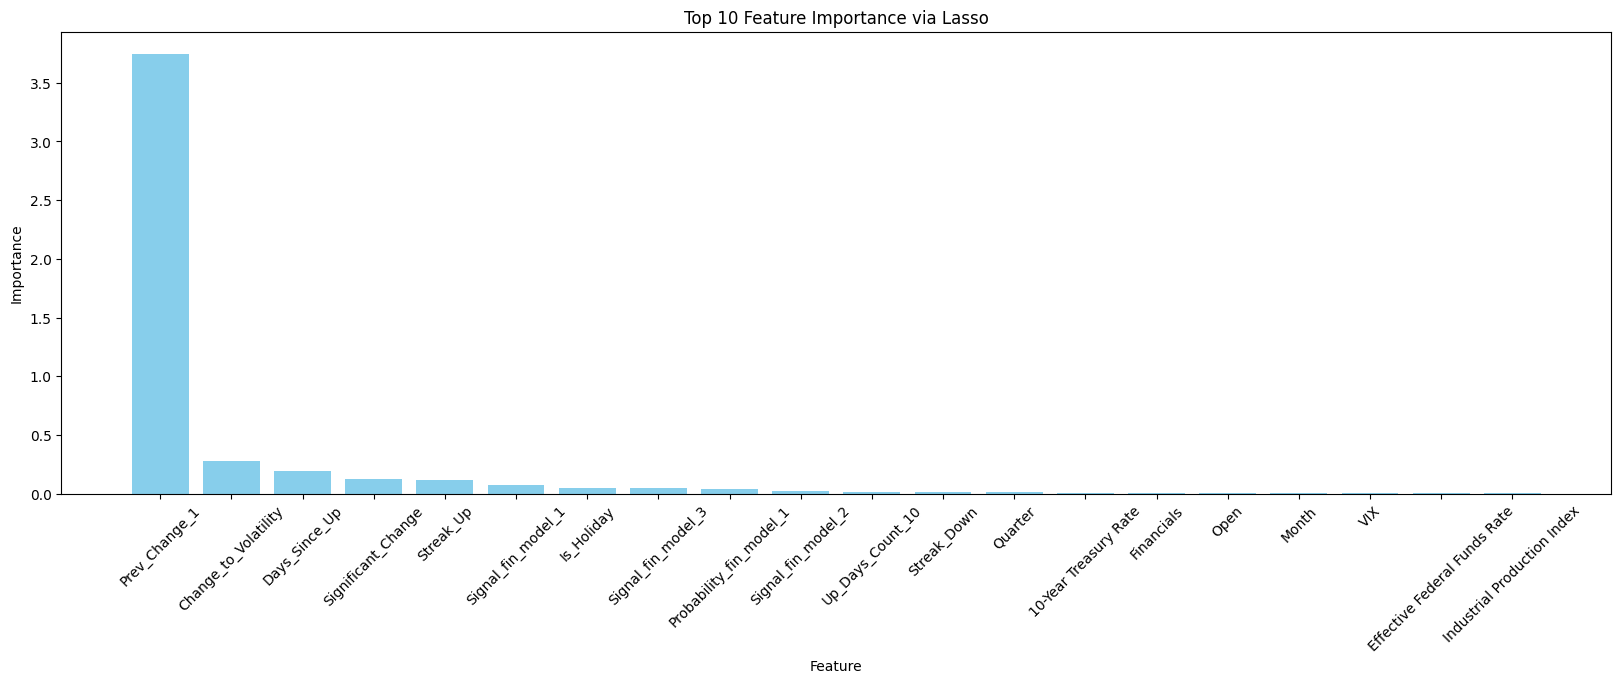

In [143]:
# Stap 4: Pas Lasso toe voor feature selectie
lasso = Lasso(alpha=0.0001)  # Kies een lage alpha-waarde
lasso.fit(X, y)  # Pas Lasso aan op de originele features en de target

# Verkrijg de absolute waarden van de Lasso-coëfficiënten
lasso_coef = np.abs(lasso.coef_)

# Maak een DataFrame met de originele kolomnamen en hun Lasso-coëfficiënten
feature_importance = pd.DataFrame({
    "Feature": X.columns,  # Gebruik de originele kolomnamen
    "Importance": lasso_coef
}).sort_values(by="Importance", ascending=False)

# Selecteer de top 10 belangrijkste features
top_10_features = feature_importance.head(20)

# Print de top 10 belangrijkste features
print("Top 10 belangrijkste features gebaseerd op Lasso:")
print(top_10_features)

# Visualiseer de top 10 feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar(top_10_features["Feature"], top_10_features["Importance"], color='skyblue')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 10 Feature Importance via Lasso")
plt.xticks(rotation=45)
plt.show()


Correlatie tussen 'Change' en target: 0.6714869456727391


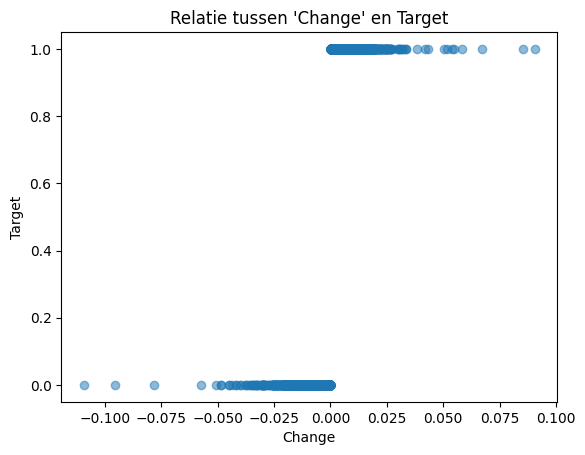

In [144]:
correlation = np.corrcoef(X['Change'], y)[0, 1]
print(f"Correlatie tussen 'Change' en target: {correlation}")

plt.scatter(X['Change'], y, alpha=0.5)
plt.title("Relatie tussen 'Change' en Target")
plt.xlabel("Change")
plt.ylabel("Target")
plt.show()


Evaluatie

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


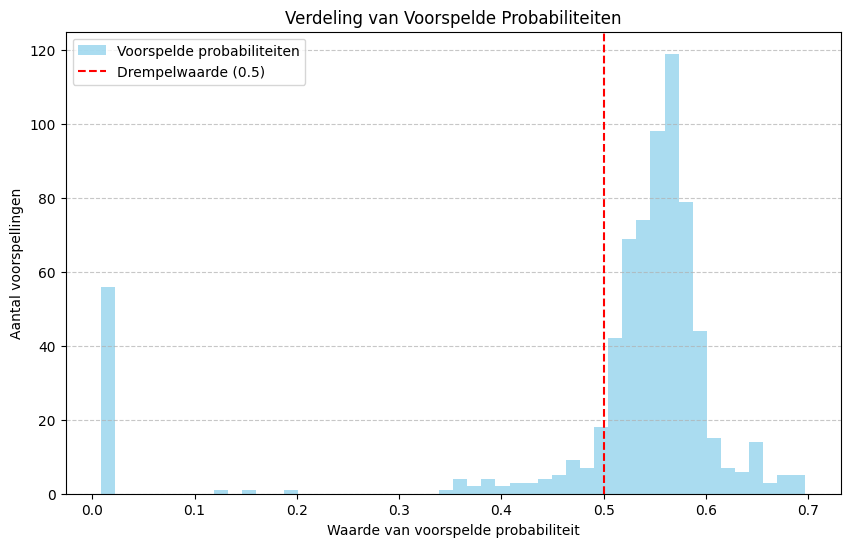

In [145]:
# Voorspel de probabiliteiten voor de testset
y_pred_probs = model.predict(X_test)

# Maak een histogram van de voorspelde probabiliteiten
plt.figure(figsize=(10, 6))
plt.hist(y_pred_probs, bins=50, alpha=0.7, label='Voorspelde probabiliteiten', color='skyblue')
plt.title('Verdeling van Voorspelde Probabiliteiten')
plt.xlabel('Waarde van voorspelde probabiliteit')
plt.ylabel('Aantal voorspellingen')
plt.axvline(drempelwaarde, color='red', linestyle='--', label='Drempelwaarde (0.5)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


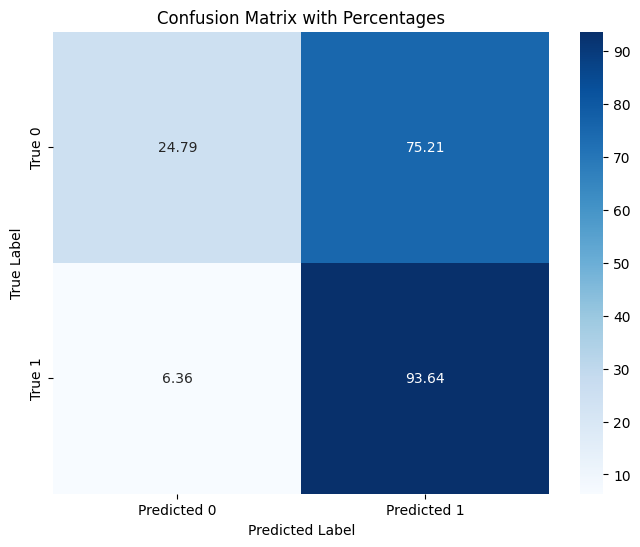

In [146]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Bereken de voorspellingen
y_pred = model.predict(X_test)
y_pred_class = (y_pred > drempelwaarde).astype(int)  # Classificatie op basis van een drempel van 0.5

# Maak de confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Bereken percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=True,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["True 0", "True 1"])

# Voeg titels en labels toe
plt.title("Confusion Matrix with Percentages")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


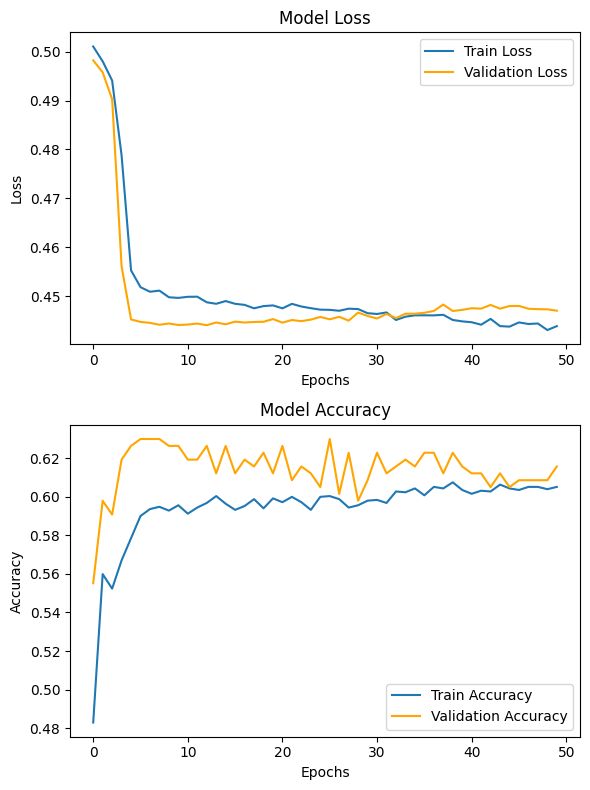

In [147]:
import matplotlib.pyplot as plt

# Zorg dat je het history-object hebt (verkregen uit model.fit())
# Bijvoorbeeld:
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Plot de verliescurves (loss)
plt.figure(figsize=(6, 8))

# Train loss en Validation loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot de nauwkeurigheid (accuracy)
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Toon de plots
plt.tight_layout()
plt.show()


In [148]:
from sklearn.metrics import classification_report, accuracy_score

# Zorg dat je voorspellingen maakt
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Binaire classificatie (threshold = 0.5)

# Bereken de accuracy
accuracy = accuracy_score(y_test, y_pred)
# Genereer het classificatierapport
report = classification_report(y_test, y_pred, target_names=['0', '1'])

print(f"Accuracy: {accuracy:.4f}")
print(report)



22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.5877
              precision    recall  f1-score   support

           0       0.80      0.25      0.38       355
           1       0.55      0.94      0.69       346

    accuracy                           0.59       701
   macro avg       0.67      0.59      0.54       701
weighted avg       0.68      0.59      0.53       701



Implementatie

In [149]:
import alpaca_trade_api as tradeapi
import numpy as np

# Alpaca API-sleutels en configuratie
API_KEY = 'AKLB2XA7IVJTOVHHW1BM'
SECRET_KEY = 'm95dvnkyqw4mNY9T6aHjAQBgrkdufgC3lZhIIXHE'
BASE_URL = 'https://paper-api.alpaca.markets'  # Gebruik paper trading voor tests

api = tradeapi.REST(API_KEY, SECRET_KEY, BASE_URL, api_version='v2')

# Startkapitaal en ticker
start_balance = 1000.0  # Begin met 1000 euro
balance = start_balance
ticker = "SPY"
position = 0  # Begin zonder aandelen


# def simulate_trading_with_prepared_data(model, X_seqs, y_seqs, historical_prices, historical_dates, start_balance=1000.0):
#     """
#     Simuleer de trading-strategie met een geprepareerde dataset.
#     :param model: Het getrainde model dat voorspellingen doet.
#     :param X_seqs: De sequenties gebruikt als input voor het model.
#     :param y_seqs: De daadwerkelijke stijging/daling (target).
#     :param historical_prices: De corresponderende slotkoersen.
#     :param historical_dates: De corresponderende datums.
#     :param start_balance: Het startkapitaal.
#     """
#     balance = start_balance
#     position = 0
#     transactions = []  # Lijst om transacties bij te houden

#     # Zorg dat de simulatie stopt vóór de grenzen van historical_prices of historical_dates
#     max_index = len(historical_prices) - len(X_seqs[0])

#     for i in range(min(len(X_seqs), max_index)):  # Beperk het aantal iteraties
#         # Voorspel de koersbeweging
#         prediction = model.predict(X_seqs[i].reshape(1, X_seqs.shape[1], X_seqs.shape[2]))[0][0]

#         close_price = historical_prices[i + len(X_seqs[0])]  # Slotkoers na de huidige sequentie
#         date = historical_dates[i + len(X_seqs[0])]  # Datum van de transactie

#         # Koop of verkoop op basis van de voorspelling
#         if prediction > 0.5:  # Voorspelling voor stijging
#             if position == 0:  # Koop als je geen aandelen hebt
#                 position = balance // close_price
#                 balance -= position * close_price
#                 transactions.append({
#                     'Datum': date,
#                     'Actie': 'Kopen',
#                     'Aantal': position,
#                     'Prijs per aandeel': round(close_price, 2),
#                     'Saldo na transactie': round(balance, 2)
#                 })
#                 print(f"Kopen: {position} aandelen tegen {close_price:.2f} op {date}, resterend saldo: {balance:.2f}")
#         else:  # Voorspelling voor daling
#             if position > 0:  # Verkoop als je aandelen hebt
#                 balance += position * close_price
#                 transactions.append({
#                     'Datum': date,
#                     'Actie': 'Verkopen',
#                     'Aantal': position,
#                     'Prijs per aandeel': round(close_price, 2),
#                     'Saldo na transactie': round(balance, 2)
#                 })
#                 print(f"Verkopen: {position} aandelen tegen {close_price:.2f} op {date}, nieuw saldo: {balance:.2f}")
#                 position = 0

#     # Eindbalans tonen
#     print(f"Eindbalans: {balance:.2f}, resterende aandelen: {position}")

#     # Converteer transacties naar een DataFrame en retourneer
#     transactions_df = pd.DataFrame(transactions)
#     return transactions_df

def simulate_trading_with_prepared_data(
    model, X_seqs, y_seqs, historical_prices, historical_dates, start_balance=1000.0, threshold=0.5
):
    """
    Simuleer de trading-strategie met een geprepareerde dataset en een dynamische drempelwaarde.
    :param model: Het getrainde model dat voorspellingen doet.
    :param X_seqs: De sequenties gebruikt als input voor het model.
    :param y_seqs: De daadwerkelijke stijging/daling (optioneel).
    :param historical_prices: De corresponderende slotkoersen.
    :param historical_dates: De corresponderende datums.
    :param start_balance: Het startkapitaal.
    :param threshold: De drempelwaarde voor het nemen van beslissingen.
    :return: DataFrame met transacties.
    """
    balance = start_balance
    position = 0
    transactions = []  # Lijst om transacties bij te houden

    # Zorg dat de simulatie stopt vóór de grenzen van historical_prices of historical_dates
    max_index = len(historical_prices) - len(X_seqs[0])

    for i in range(min(len(X_seqs), max_index)):  # Beperk het aantal iteraties
        # Voorspel de koersbeweging
        prediction = model.predict(X_seqs[i].reshape(1, X_seqs.shape[1], X_seqs.shape[2]))[0][0]

        close_price = historical_prices[i + len(X_seqs[0])]  # Slotkoers na de huidige sequentie
        date = historical_dates[i + len(X_seqs[0])]  # Datum van de transactie

        # Koop of verkoop op basis van de voorspelling en de drempelwaarde
        if prediction >= threshold:  # Voorspelling voor stijging met drempel
            if position == 0:  # Koop als je geen aandelen hebt
                position = balance // close_price
                balance -= position * close_price
                transactions.append({
                    'Datum': date,
                    'Actie': 'Kopen',
                    'Aantal': position,
                    'Prijs per aandeel': round(close_price, 2),
                    'Saldo na transactie': round(balance, 2)
                })
                print(f"Kopen: {position} aandelen tegen {close_price:.2f} op {date}, resterend saldo: {balance:.2f}")
        elif prediction < threshold:  # Voorspelling voor daling
            if position > 0:  # Verkoop als je aandelen hebt
                balance += position * close_price
                transactions.append({
                    'Datum': date,
                    'Actie': 'Verkopen',
                    'Aantal': position,
                    'Prijs per aandeel': round(close_price, 2),
                    'Saldo na transactie': round(balance, 2)
                })
                print(f"Verkopen: {position} aandelen tegen {close_price:.2f} op {date}, nieuw saldo: {balance:.2f}")
                position = 0

    # Eindbalans tonen
    print(f"Eindbalans: {balance:.2f}, resterende aandelen: {position}")

    # Converteer transacties naar een DataFrame en retourneer
    transactions_df = pd.DataFrame(transactions)
    return transactions_df



In [150]:
# Stel geprepareerde data in
historical_prices = df_fin_model_1['Close'].values  # Slotkoersen
historical_dates = df_fin_model_1.index  # Gebruik de index als datums

X_seqs = X_seqs[100:]  # Simuleer vanaf 100 dagen geleden
historical_prices = historical_prices[130:]  # Zorg dat slotkoersen overeenkomen
historical_dates = historical_dates[130:]  # Zorg dat de datums overeenkomen

# Simulatie uitvoeren
transactions_df = simulate_trading_with_prepared_data(model, X_seqs, y_seqs, historical_prices, historical_dates, start_balance=1000.0)

# Toon de transacties
print(transactions_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Kopen: 7.0 aandelen tegen 129.51 op 2012-01-12 00:00:00, resterend saldo: 93.43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━

In [151]:
# Voeg kolommen toe voor metrics
transactions_df['Winst per Trade'] = 0.0
transactions_df['Aantal Dagen per Trade'] = 0
transactions_df['Winst per Trade per Dag'] = 0.0

# Zorg ervoor dat koop/verkoop correct worden gepaard
for i in range(1, len(transactions_df), 2):  # Start bij de tweede rij (verkoop)
    if transactions_df.iloc[i]['Actie'] == 'Verkopen' and transactions_df.iloc[i - 1]['Actie'] == 'Kopen':
        # Bereken winst per trade
        winst_per_trade = (
            transactions_df.iloc[i]['Saldo na transactie'] - transactions_df.iloc[i - 1]['Saldo na transactie']
        )
        # Bereken het aantal dagen tussen de trades
        aantal_dagen = (pd.to_datetime(transactions_df.iloc[i]['Datum']) -
                        pd.to_datetime(transactions_df.iloc[i - 1]['Datum'])).days
        # Winst per dag
        winst_per_dag = winst_per_trade / aantal_dagen if aantal_dagen > 0 else 0
        
        # Voeg de waarden toe aan het DataFrame
        transactions_df.loc[i, 'Winst per Trade'] = winst_per_trade
        transactions_df.loc[i, 'Aantal Dagen per Trade'] = aantal_dagen
        transactions_df.loc[i, 'Winst per Trade per Dag'] = winst_per_dag

# Bereken de totale winst van het algoritme
totale_winst_algoritme = transactions_df['Winst per Trade'].sum()

# Bereken de prijsstijging van Buy-and-Hold
start_price = transactions_df.iloc[0]['Prijs per aandeel']
end_price = transactions_df.iloc[-1]['Prijs per aandeel']
buy_and_hold_winst = (end_price - start_price) * (start_balance // start_price)

# Bereken het verschil tussen het algoritme en Buy-and-Hold
winst_tov_buy_and_hold = totale_winst_algoritme - buy_and_hold_winst

# # Resultaten weergeven
# print(f"Totale winst van het algoritme: €{totale_winst_algoritme:.2f}")
# print(f"Prijsstijging Buy-and-Hold strategie: €{buy_and_hold_winst:.2f}")
# print(f"Extra winst van het algoritme t.o.v. Buy-and-Hold: €{winst_tov_buy_and_hold:.2f}")

# # Toon een samenvatting van de metrics
# print("\nSamenvatting van trades:")
# print(transactions_df[['Datum', 'Actie', 'Winst per Trade', 'Aantal Dagen per Trade', 'Winst per Trade per Dag']])

# Optioneel: Exporteer de resultaten
transactions_df.to_csv('transactie_overzicht_met_metrics.csv', index=False)


In [152]:
# Bereken het aantal trades (koop/verkoop-acties)
aantal_trades = transactions_df['Actie'].value_counts()

# Specifiek het aantal kopen en verkopen
aantal_kopen = aantal_trades.get('Kopen', 0)
aantal_verkopen = aantal_trades.get('Verkopen', 0)

# Controleer of ze in paren zijn
print(f"Aantal kopen: {aantal_kopen}")
print(f"Aantal verkopen: {aantal_verkopen}")



Aantal kopen: 16
Aantal verkopen: 16


In [153]:
# Voeg een kolom toe voor de waarde bij Buy-and-Hold
transactions_df['Buy-and-Hold Winst'] = 0.0

# Bereken de startprijs en startaantal aandelen
start_price = transactions_df.iloc[0]['Prijs per aandeel']
start_shares = start_balance // start_price

# Bereken de winst die je zou hebben met Buy-and-Hold bij elke transactie
for i in range(len(transactions_df)):
    current_price = transactions_df.iloc[i]['Prijs per aandeel']
    buy_and_hold_value = start_shares * current_price  # Waarde van aandelen bij de huidige prijs
    transactions_df.loc[i, 'Buy-and-Hold Winst'] = buy_and_hold_value

# Bereken het verschil tussen algoritme en Buy-and-Hold
transactions_df['Winst Verschil (vs Buy-and-Hold)'] = (
    transactions_df['Saldo na transactie'] - transactions_df['Buy-and-Hold Winst']
)

# # Print het bijgewerkte overzicht
# print(transactions_df[['Datum', 'Actie', 'Saldo na transactie', 'Buy-and-Hold Winst', 'Winst Verschil (vs Buy-and-Hold)']])

# Optioneel: Exporteer naar CSV
transactions_df.to_csv('transactie_overzicht_met_buy_and_hold.csv', index=False)


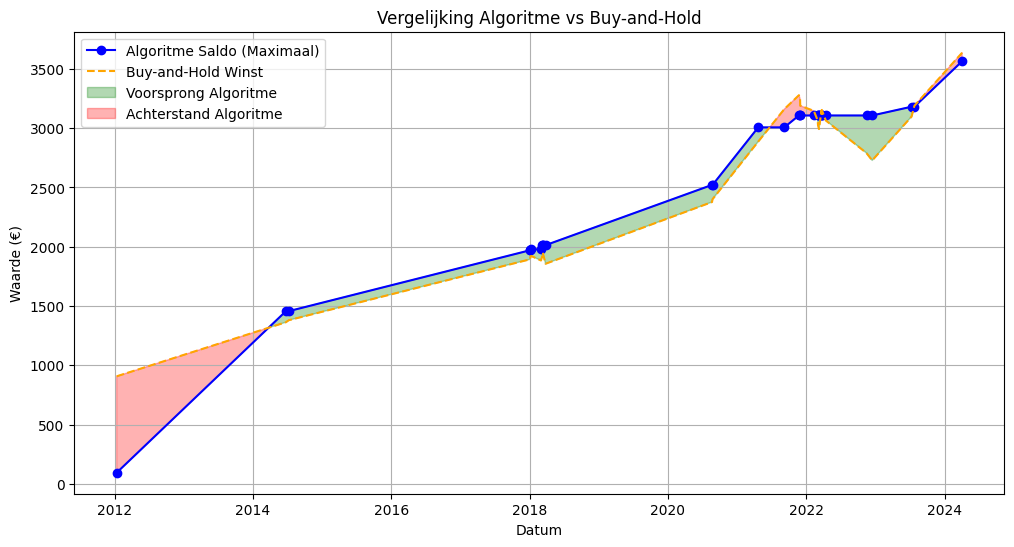

In [154]:
import matplotlib.pyplot as plt
import pandas as pd

# Voeg hier je dataframe met gegevens toe
# transactions_df = jouw dataset

# Bereken de cumulatieve maximale waarde (ongeziene waarde van de portefeuille)
transactions_df['Cumulatieve Waarde'] = transactions_df['Saldo na transactie'].cummax()

# Plot de grafiek
plt.figure(figsize=(12, 6))
plt.plot(transactions_df['Datum'], transactions_df['Cumulatieve Waarde'], label='Algoritme Saldo (Maximaal)', color='blue', marker='o')
plt.plot(transactions_df['Datum'], transactions_df['Buy-and-Hold Winst'], label='Buy-and-Hold Winst', linestyle='--', color='orange')

# Voeg de groene en rode schaduw toe
plt.fill_between(
    transactions_df['Datum'], transactions_df['Cumulatieve Waarde'], transactions_df['Buy-and-Hold Winst'],
    where=(transactions_df['Cumulatieve Waarde'] > transactions_df['Buy-and-Hold Winst']),
    interpolate=True, color='green', alpha=0.3, label='Voorsprong Algoritme'
)
plt.fill_between(
    transactions_df['Datum'], transactions_df['Cumulatieve Waarde'], transactions_df['Buy-and-Hold Winst'],
    where=(transactions_df['Cumulatieve Waarde'] <= transactions_df['Buy-and-Hold Winst']),
    interpolate=True, color='red', alpha=0.3, label='Achterstand Algoritme'
)

# Voeg de grafiektitels en labels toe
plt.title('Vergelijking Algoritme vs Buy-and-Hold')
plt.xlabel('Datum')
plt.ylabel('Waarde (€)')
plt.legend()
plt.grid()
plt.show()


In [155]:
# import matplotlib.pyplot as plt

# def plot_trading_signals(historical_prices, historical_dates, transactions_df):
#     """
#     Plot de S&P 500 koers samen met de koop- en verkoopsignalen.
    
#     :param historical_prices: Array of lijst met slotkoersen.
#     :param historical_dates: Array of lijst met datums.
#     :param transactions_df: DataFrame met transacties (Datum, Actie).
#     """
#     # Zet historische prijzen en datums om naar pandas Series voor eenvoud
#     price_series = pd.Series(historical_prices, index=historical_dates)

#     # Filter koop- en verkooppunten
#     koop_signalen = transactions_df[transactions_df['Actie'] == 'Kopen']
#     verkoop_signalen = transactions_df[transactions_df['Actie'] == 'Verkopen']

#     # Plot de koers van de S&P 500
#     plt.figure(figsize=(12, 6))
#     plt.plot(price_series, label="S&P 500 Koers", color="blue", linewidth=1)

#     # Voeg koop- en verkoopsignalen toe aan de plot
#     plt.scatter(koop_signalen['Datum'], koop_signalen['Prijs per aandeel'], 
#                 color='green', marker='^', label='Koop', s=100, zorder=5)
#     plt.scatter(verkoop_signalen['Datum'], verkoop_signalen['Prijs per aandeel'], 
#                 color='red', marker='v', label='Verkoop', s=100, zorder=5)

#     # Voeg labels en titel toe
#     plt.title("S&P 500 Koers met Koop- en Verkoopsignalen", fontsize=16)
#     plt.xlabel("Datum", fontsize=12)
#     plt.ylabel("Prijs ($)", fontsize=12)
#     plt.legend()
#     plt.grid(alpha=0.3)
#     plt.tight_layout()
#     plt.show()

# # Roep de functie aan om de plot te maken
# plot_trading_signals(historical_prices, historical_dates, transactions_df)


In [156]:
# import plotly.graph_objects as go

# def plot_trading_signals_interactive(historical_prices, historical_dates, transactions_df):
#     """
#     Maak een interactieve plotly grafiek met koop- en verkoopsignalen.
#     """
#     # Voeg de S&P 500 koerslijn toe
#     fig = go.Figure()

#     # S&P 500 Koers
#     fig.add_trace(go.Scatter(
#         x=historical_dates, 
#         y=historical_prices, 
#         mode='lines',
#         name='S&P 500 Koers',
#         line=dict(color='blue')
#     ))

#     # Koop-signalen
#     koop_signalen = transactions_df[transactions_df['Actie'] == 'Kopen']
#     fig.add_trace(go.Scatter(
#         x=koop_signalen['Datum'], 
#         y=koop_signalen['Prijs per aandeel'],
#         mode='markers',
#         name='Koop',
#         marker=dict(color='green', size=10, symbol='triangle-up')
#     ))

#     # Verkoop-signalen
#     verkoop_signalen = transactions_df[transactions_df['Actie'] == 'Verkopen']
#     fig.add_trace(go.Scatter(
#         x=verkoop_signalen['Datum'], 
#         y=verkoop_signalen['Prijs per aandeel'],
#         mode='markers',
#         name='Verkoop',
#         marker=dict(color='red', size=10, symbol='triangle-down')
#     ))

#     # Lay-out aanpassen
#     fig.update_layout(
#         title="S&P 500 Koers met Koop- en Verkoopsignalen (Interactief)",
#         xaxis_title="Datum",
#         yaxis_title="Prijs ($)",
#         legend_title="Signalen",
#         template="plotly_white"
#     )

#     # Toon de interactieve grafiek
#     fig.show()

# # Roep de functie aan om de interactieve plot te maken
# plot_trading_signals_interactive(historical_prices, historical_dates, transactions_df)


Performance

Implementatie

In [ ]:
print(test_data[['Daily_Return', 'Signal']].head(50))
test_data.shape

    Daily_Return  Signal
0       0.005790       1
1      -0.000335       0
2      -0.019202       0
3      -0.000939       0
4      -0.003954       0
5      -0.001244       1
6       0.009108       0
7       0.002704       0
8      -0.013779       0
9       0.000409       0
10     -0.017710       0
11     -0.010384       0
12     -0.011068       0
13     -0.019631       0
14      0.004247       0
15     -0.012209       0
16     -0.002509       0
17     -0.004938       1
18      0.024835       1
19      0.018011       1
20      0.006757       1
21      0.009714       0
22     -0.023505       1
23      0.004702       1
24     -0.003209       1
25      0.008228       0
26      0.014636       1
27     -0.017966       0
28     -0.019719       0
29     -0.003269       0
30      0.016127       1
31      0.001121       1
32     -0.021361       0
33     -0.006475       1
34     -0.010732       1
35     -0.017739       1
36      0.015049       1
37      0.022064       0
38     -0.002559       0


(736, 7)

In [ ]:
print("Distributie van y (target):")
print(pd.Series(y).value_counts())


Distributie van y (target):
Target
1    1885
0    1885
Name: count, dtype: int64


In [ ]:
print("Voorspelde kansen (eerste 10):")
print(y_pred_prob[:50])


Voorspelde kansen (eerste 10):
[[0.5248951 ]
 [0.4667055 ]
 [0.45607814]
 [0.4716974 ]
 [0.484223  ]
 [0.5668514 ]
 [0.42876133]
 [0.45507193]
 [0.46405706]
 [0.46245685]
 [0.3910714 ]
 [0.44994974]
 [0.45393854]
 [0.4623197 ]
 [0.49471253]
 [0.46727914]
 [0.48965254]
 [0.5316659 ]
 [0.5144268 ]
 [0.5361184 ]
 [0.5311037 ]
 [0.47592586]
 [0.5397073 ]
 [0.5026837 ]
 [0.53091145]
 [0.45326188]
 [0.57148135]
 [0.44322816]
 [0.4941548 ]
 [0.47156954]
 [0.5572053 ]
 [0.5141391 ]
 [0.46868208]
 [0.51838505]
 [0.5407441 ]
 [0.6101604 ]
 [0.5520383 ]
 [0.47034016]
 [0.42874864]
 [0.5310336 ]
 [0.4338824 ]
 [0.5140402 ]
 [0.451685  ]
 [0.5073151 ]
 [0.4319962 ]
 [0.541757  ]
 [0.5383878 ]
 [0.5443784 ]
 [0.5256222 ]
 [0.5024748 ]]


In [ ]:
# def save_all_datasets_to_csv(globals_dict, output_dir="datasets"):
#     """
#     Slaat alle pandas DataFrames in de huidige omgeving op als CSV-bestanden,
#     alleen als de variabele een logische naam heeft.
#     """
#     # Controleer of de outputmap bestaat, zo niet, maak deze aan
#     os.makedirs(output_dir, exist_ok=True)
    
#     for var_name, var_value in globals_dict.items():
#         # Controleer of het een DataFrame is en of de naam geen tijdelijke variabele lijkt
#         if isinstance(var_value, pd.DataFrame) and not var_name.startswith("_"):
#             # Maak een bestandspad voor de CSV
#             csv_path = os.path.join(output_dir, f"{var_name}.csv")
#             var_value.to_csv(csv_path, index=False)
#             print(f"Dataset '{var_name}' opgeslagen als: {csv_path}")

# # Sla alle DataFrames op als CSV in de map 'datasets'
# save_all_datasets_to_csv(globals())